# 🚢 Titanic Survival Prediction — EDA & Machine Learning

## 📌 Objective
Perform Exploratory Data Analysis (EDA) and compare multiple Machine Learning models to predict passenger survival.

## 🔍 Tasks Covered
- Handling missing values
- Feature Engineering
- Data Visualization
- Model Comparison

## 🤖 Models Used
- Logistic Regression
- Decision Tree
- Random Forest


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

print("Libraries imported successfully ✅")

Libraries imported successfully ✅


In [2]:
# Load dataset
df = pd.read_csv("../data/titanic.csv")

print("Dataset Loaded Successfully 🚀")
df.head()

Dataset Loaded Successfully 🚀


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🔎 Missing Value Analysis
Some columns contain missing values such as Age and Cabin.
These will be handled using median filling or column removal.

In [6]:
# Handle missing values

# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Fill Embarked with most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("Missing values handled successfully ✅")
df.isnull().sum()

Missing values handled successfully ✅


C:\Users\Admn\AppData\Local\Temp\ipykernel_13912\108218403.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admn\AppData\Local\Temp\ipykernel_13912\108218403.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 🧹 Data Cleaning & Feature Engineering

- Age missing values filled using median.
- Cabin column removed due to excessive missing data.
- Embarked missing values filled using mode.

In [7]:
# Convert categorical columns to numeric
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


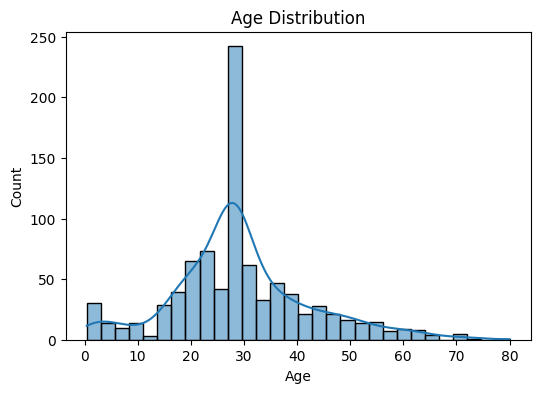

In [8]:
# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

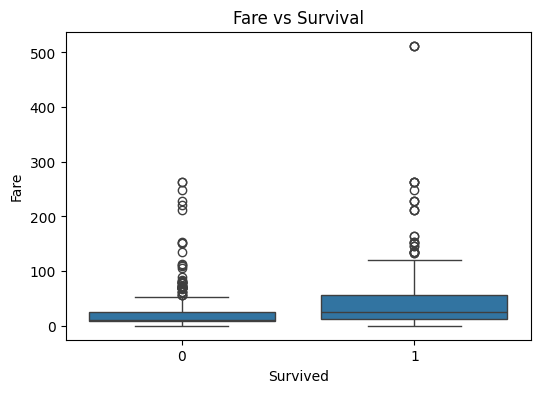

In [9]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

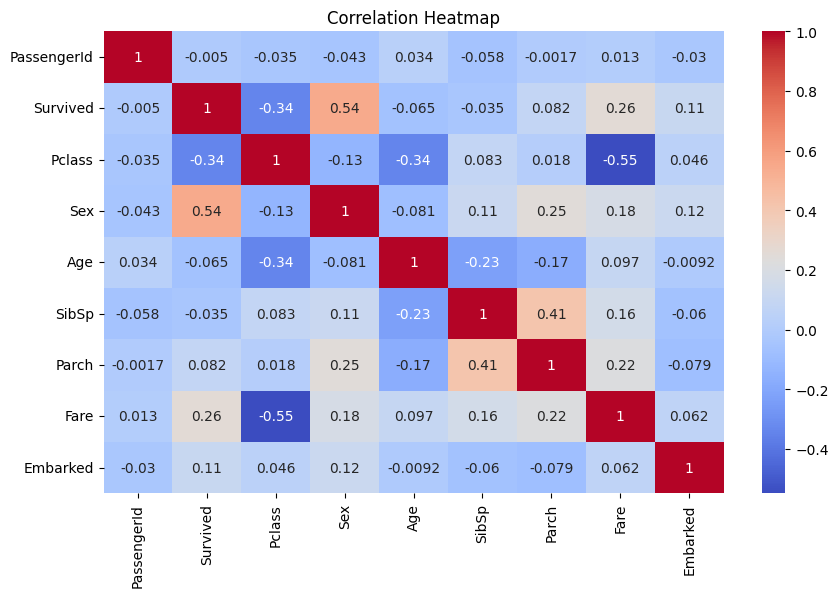

In [11]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 🤖 Model Development

Preparing data for machine learning by selecting features and splitting dataset into training and testing sets.

In [12]:
# Select features for training

# Drop non-numeric/text columns
df_model = df.drop(['Name','Ticket','PassengerId'], axis=1)

# Define features (X) and target (y)
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data prepared for ML ✅")

Data prepared for ML ✅


In [13]:
# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 0.7988826815642458


In [14]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_acc)

Decision Tree Accuracy: 0.776536312849162


In [15]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8044692737430168


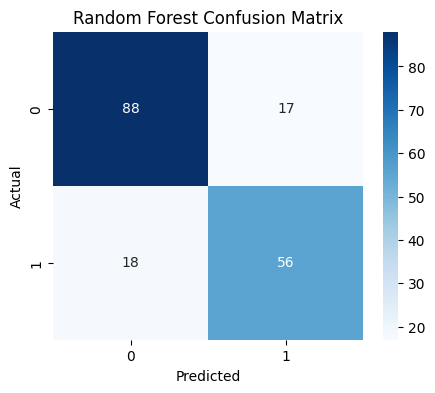

In [16]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

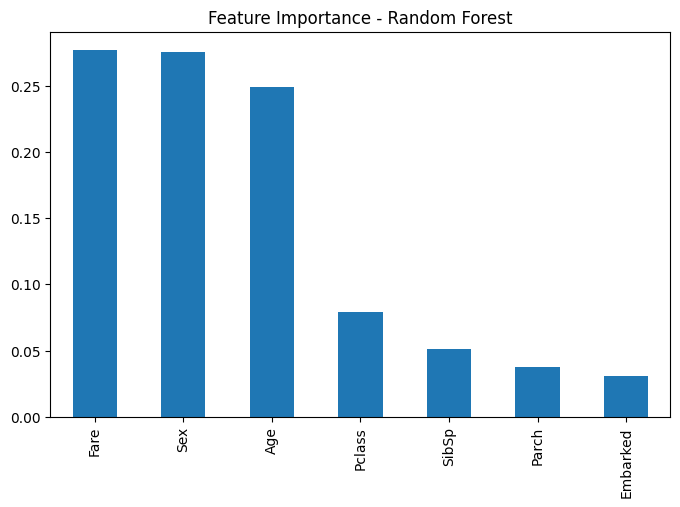

In [17]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()

## 📊 Model Insights

- Random Forest achieved highest accuracy among all models.
- Fare and Sex appear as strong predictive features.
- Ensemble methods provide better generalization compared to single decision trees.

## ⚙️ Hyperparameter Tuning (GridSearchCV)

GridSearchCV is used to find the best parameters for Random Forest to improve model performance.

In [18]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None,5,10],
    'min_samples_split': [2,5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1
)

print("Starting GridSearchCV... ⏳")
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Starting GridSearchCV... ⏳
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [19]:
# Evaluate tuned model
best_pred = best_rf.predict(X_test)

tuned_acc = accuracy_score(y_test, best_pred)
print("Tuned Random Forest Accuracy:", tuned_acc)

Tuned Random Forest Accuracy: 0.8100558659217877


## 🚀 Tuning Result

After applying GridSearchCV, the Random Forest model performance improved by selecting optimal hyperparameters.

In [20]:
import pickle

# Save tuned Random Forest model
with open("../titanic_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("Model saved successfully ✅")

Model saved successfully ✅
